In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from PIL import Image
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
telcom=pd.read_csv('churn.csv')
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
print("\n\nRows: ",telcom.shape[0])
print("\n\nColumns: ",telcom.shape[1])
print("\n\nFeatures: ", telcom.columns.tolist())
print("\n\nMissing Values: ",telcom.isnull().sum().values.sum())
print("\n\nUnique values: \n",telcom.nunique())



Rows:  7043


Columns:  21


Features:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


Missing Values:  0


Unique values: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
# Replacing spaces with null values to Totalcharges
telcom['TotalCharges']=telcom['TotalCharges'].replace(" ",np.nan)

In [5]:
telcom=telcom[telcom['TotalCharges'].notnull()].reset_index()[telcom.columns]

In [6]:
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
telcom['TotalCharges']=telcom['TotalCharges'].astype(float)

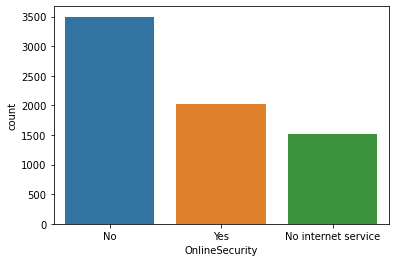

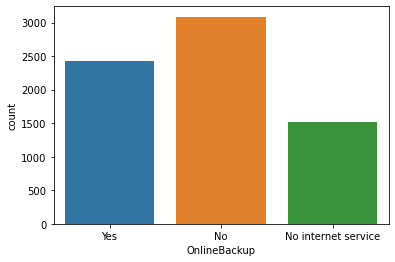

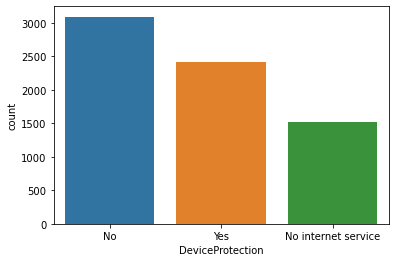

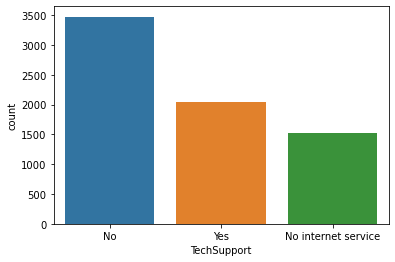

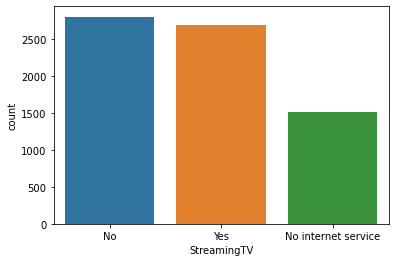

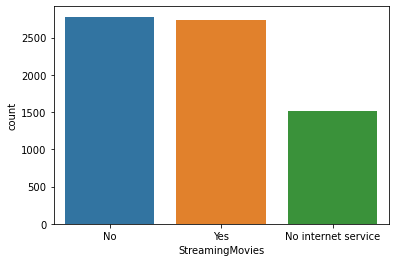

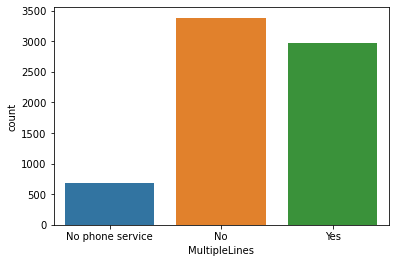

In [8]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies','MultipleLines']
for i in replace_cols:
    sns.countplot(telcom[i])
    pl.show()

In [9]:
# Change no internet service to above columns
for i in replace_cols:
    telcom[i]=telcom[i].replace("No internet service","No")

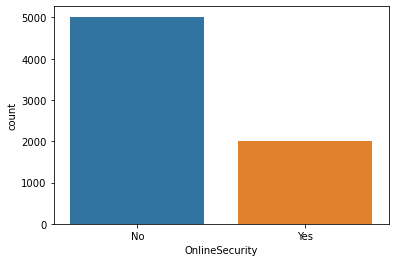

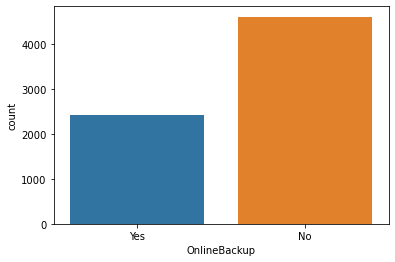

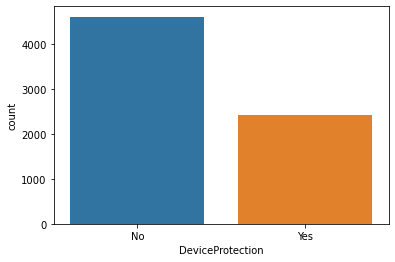

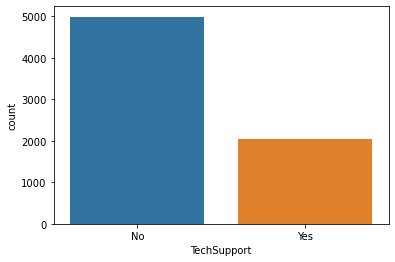

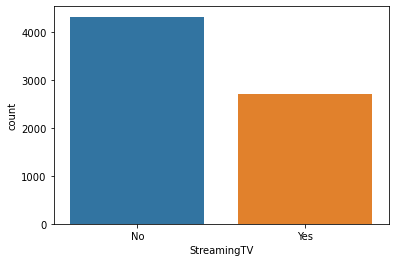

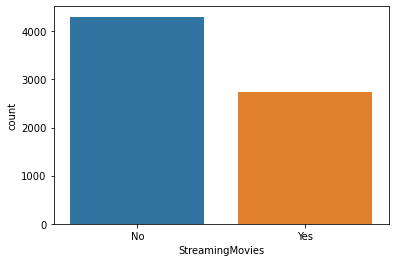

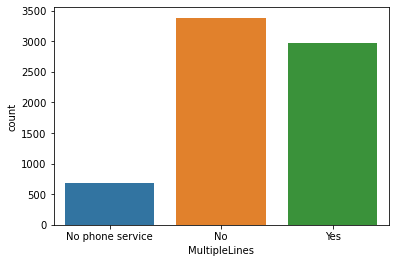

In [10]:
for i in replace_cols:
    sns.countplot(telcom[i])
    pl.show()

In [11]:
telcom['SeniorCitizen']=telcom['SeniorCitizen'].replace({1:'Yes',0:'No'})

In [12]:
def tenure_lab(telcom):
    if telcom['tenure']<=12:
        return 'Tenure_0-12'
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom['tenure_group']=telcom.apply(lambda x: tenure_lab(x),axis=1)

In [13]:
pd.DataFrame(telcom['tenure']).describe()

tenure
count  7032.000000
mean     32.421786
std      24.545260
min       1.000000
25%       9.000000
50%      29.000000
75%      55.000000
max      72.000000

In [14]:
telcom.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No   Tenure_0-12  
1               Mailed check          56.95      1889.50     No  Tenure_24-48  
2               Mailed check          53.85       108.15    Yes   Tenure_0-12  
3  Bank transfer (automatic)          42.30      1840.75     No  Tenure_24-48  
4           Electronic check          70.70       151.65    Yes   Tenure_0-12  

[5 rows x 22 columns]

In [15]:
# Separating Churn and non Churn datas
churn=telcom[telcom['Churn']=='Yes']
no_churn=telcom[telcom['Churn']=='No']

In [16]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
id_col=['customerID']
target_col=['Churn']
cat_cols=telcom.nunique()[telcom.nunique()<6].keys().tolist()
cat_cols=[i for i in cat_cols if i not in target_col]
numeric_cols=[i for i in telcom.columns if i not in cat_cols+target_col+id_col]

In [18]:
lab=telcom['Churn'].value_counts().keys().tolist()
val=telcom['Churn'].value_counts().values.tolist()
lab,val

(['No', 'Yes'], [5163, 1869])

In [19]:
trace=go.Pie(labels=lab,values=val,
            marker=dict(colors=['royalblue','lime'],
            line=dict(color='white',width=1.3)),
            rotation=90,
            hoverinfo='label+value+text',
            hole=.6)
layout=go.Layout(dict(title='Customer attrition in data',
                      plot_bgcolor='rgb(243,243,243)',
                     paper_bgcolor='rgb(243,243,243)'))
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [20]:
def plot_pie(column):
    trace1=go.Pie(values=churn[column].value_counts().values.tolist(),
                 labels=churn[column].value_counts().keys().tolist(),
                 hoverinfo='label+percent+name',
                 name='Churn Customers',
                 domain  = dict(x = [0,.48]),
                 marker=dict(line=dict(width=2,color='rgb(243,243,243)')),
                 hole=.6)
    trace2=go.Pie(values=no_churn[column].value_counts().values.tolist(),
                 labels=no_churn[column].value_counts().keys().tolist(),
                 hoverinfo='label+percent+name',
                 domain  = dict(x = [.52,1]),
                 name='Non Churn Customers',
                 marker=dict(line=dict(width=2,color='rgb(243,243,243)')),
                 hole=.6)
    layout=go.Layout(dict(title=column+' distribution in customer attrition',
                         annotations=[dict(text='Churn customers',
                                           font=dict(size=13),
                                           showarrow=False,
                                     x=.15,y=.5),
                        dict(text='Non churn customers',
                                         font=dict(size=13),
                                         showarrow=False,
                                      x=.85,y=.5)
                                     ]))
    data=[trace1,trace2]
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)

    
for i in cat_cols:
    plot_pie(i)

In [21]:
churn['MultipleLines']

2        No
4        No
5       Yes
8       Yes
13      Yes
       ... 
7010     No
7015     No
7021    Yes
7023    Yes
7030    Yes
Name: MultipleLines, Length: 1869, dtype: object

In [22]:
def makeHistogram(column):
    trace1=go.Histogram(x=churn[column],
                       name='Churn Customers',
                       marker=dict(line=dict(width=0.5,color='black')),
                       opacity=0.9)
    
    trace2=go.Histogram(x=no_churn[column],
                       name='Churn Customers',
                       marker=dict(line=dict(width=0.5,color='black')),
                       opacity=0.9)
    layout=go.Layout(dict(title=column+" distribution in customer attrition",
                         plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           ))
    data=[trace1,trace2]
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
    

for i in numeric_cols:
    makeHistogram(i)

In [23]:
def scatter_matrix(df):
    df=df.sort_values(by='Churn',ascending=True)
    classes=df['Churn'].unique().tolist()
    class_code={classes[k]: k for k in range(2)}
    color_vals=[class_code[k] for k in df['Churn']]
    
    pl_colorscale='Portland'
    text=[df.loc[k,'Churn'] for k in range(len(df))]
    
    trace=go.Splom(dimensions=[dict(label='tenure',values=df['tenure']),
                               dict(label='MonthlyCharges',values=df['MonthlyCharges']),
                               dict(label='TotalCharges',values=df['TotalCharges'])],
                  text=text,
                  marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                  )
    data=[trace]
    fig=go.Figure(data=data)
    py.iplot(fig)
    
    
scatter_matrix(telcom)

In [24]:
telcom['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
telcom.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [26]:
lists=np.where(telcom['Churn']=='Yes',1,0)

In [27]:
df=telcom.copy()
df=df.sort_values(by='Churn',ascending=True)
classes=df['Churn'].unique().tolist()
class_code={classes[k]: k for k in range(2)}
color_vals=[class_code[k] for k in df['Churn']]

In [28]:
telcom['colorz']=np.where(telcom['Churn']=='Yes',1,2)


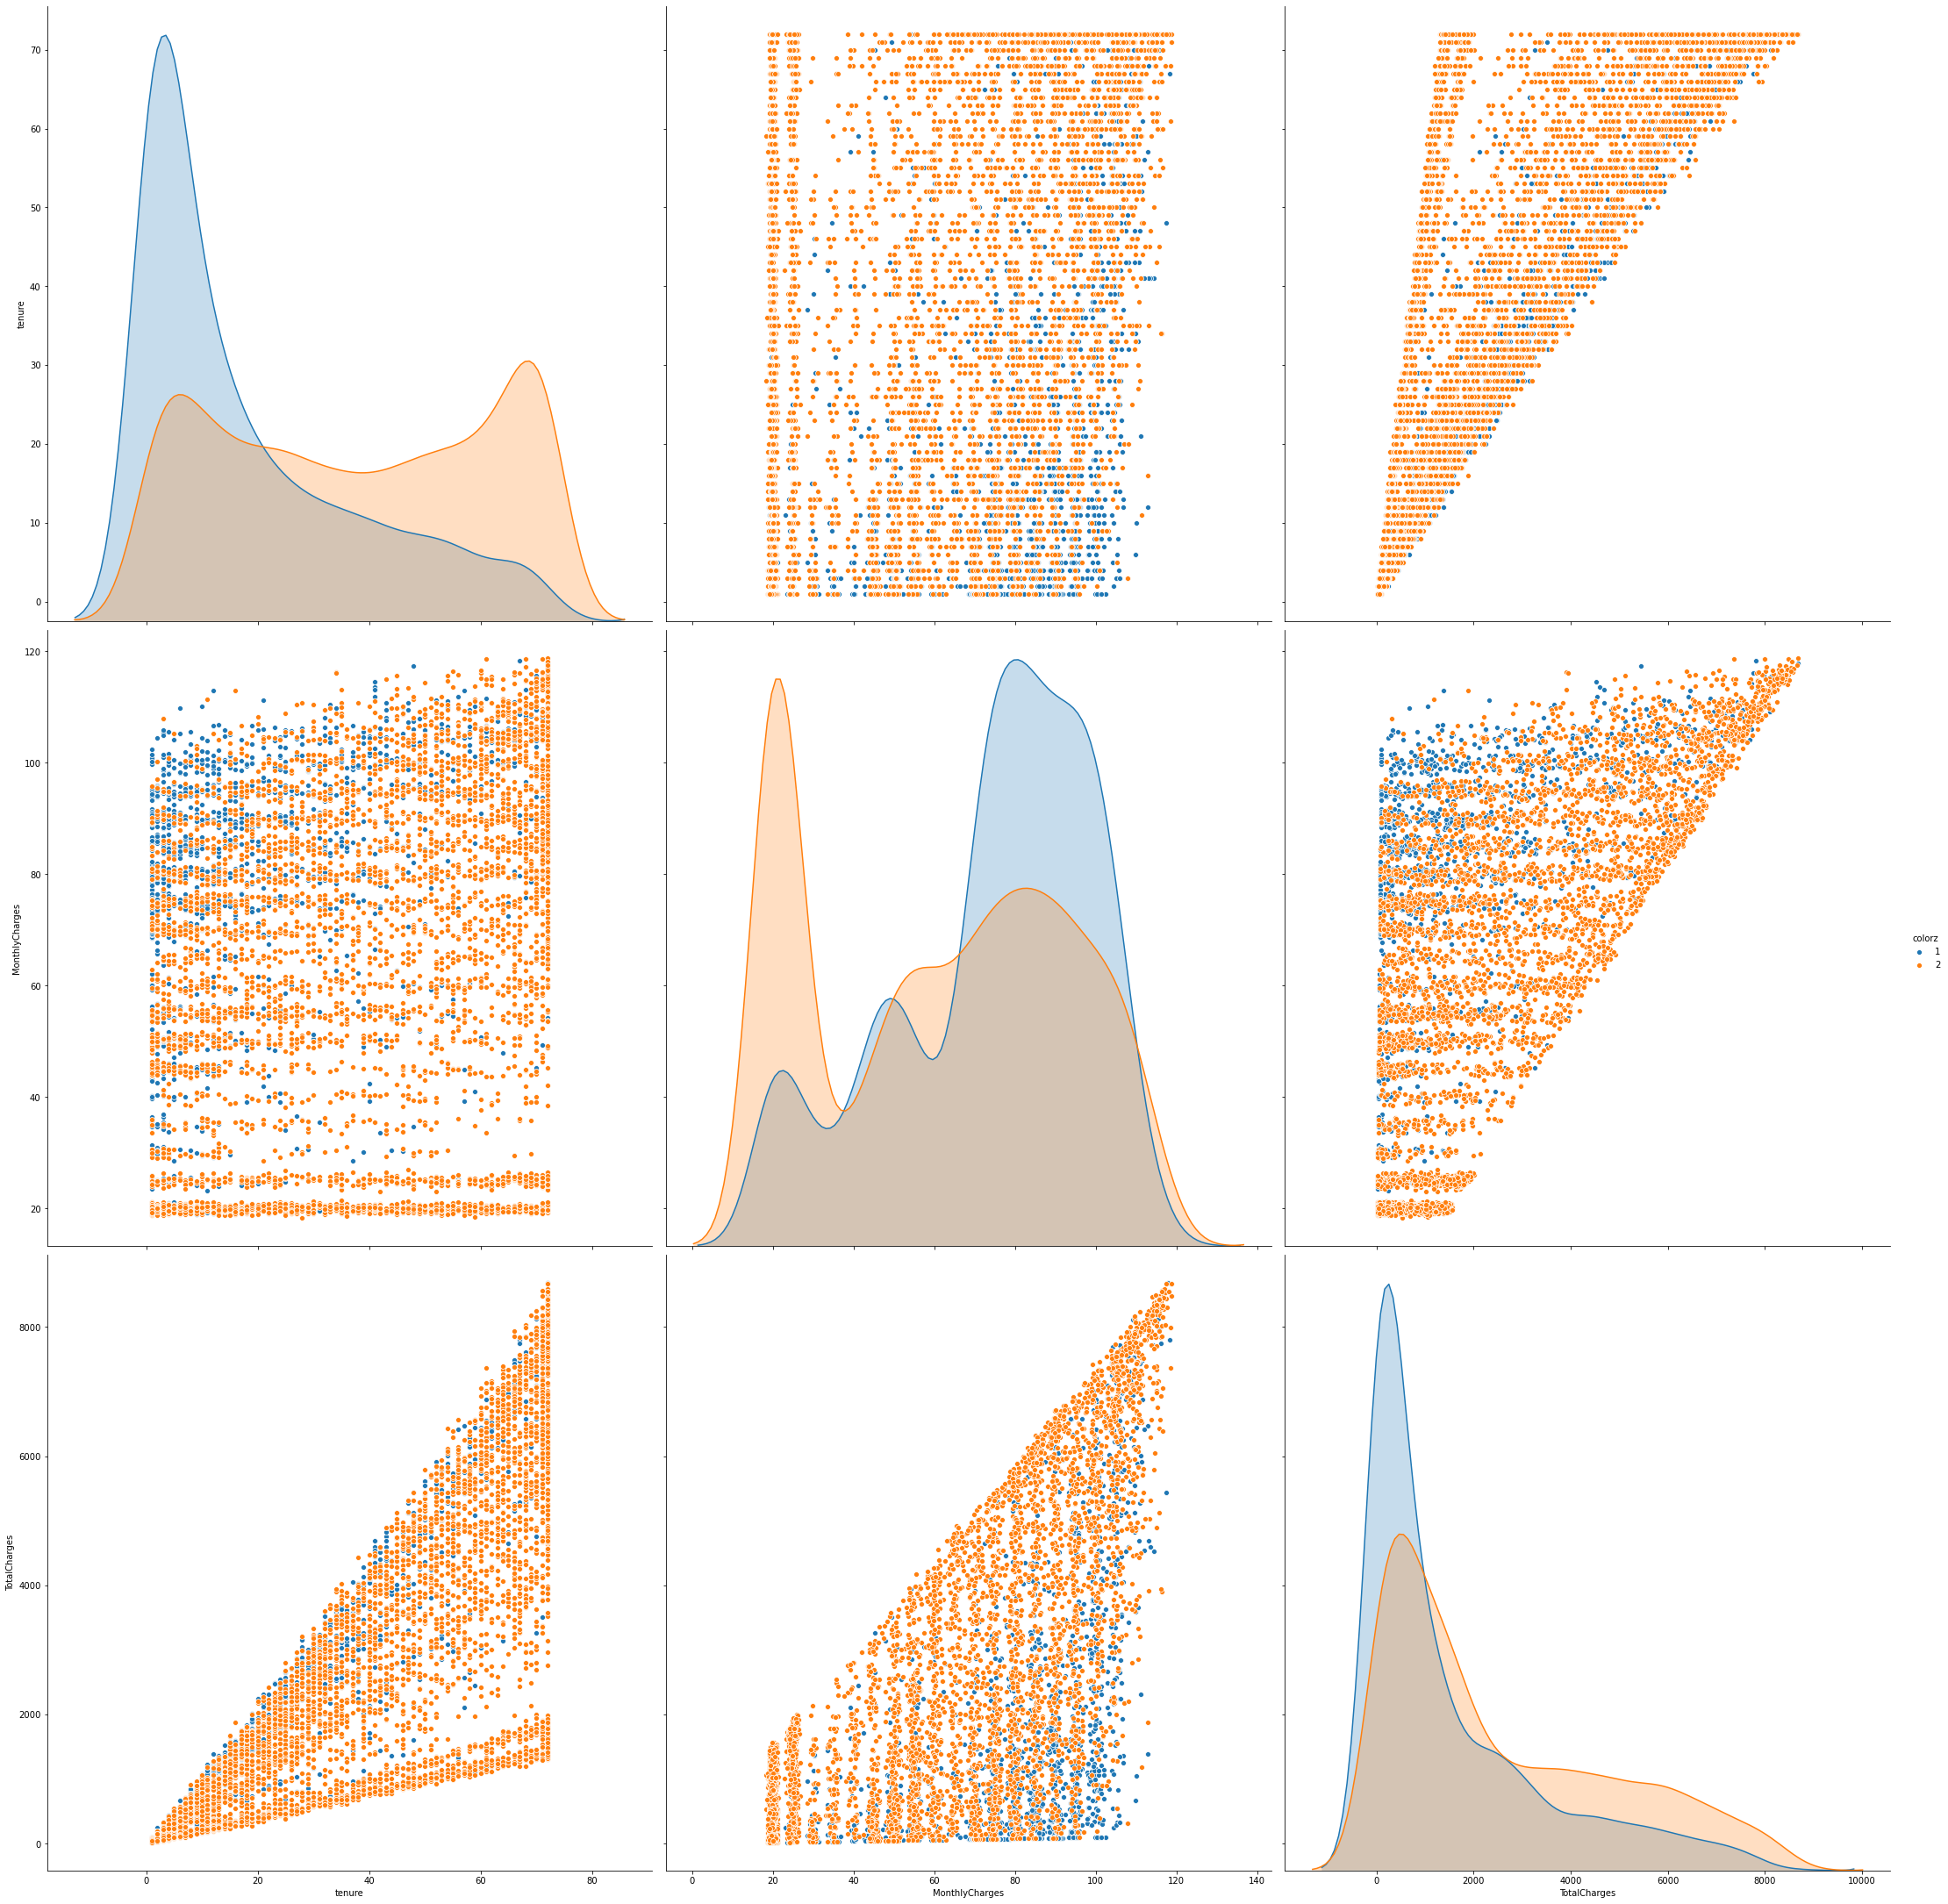

In [29]:
sns.pairplot(data=telcom,vars=numeric_cols,hue='colorz',size=10)

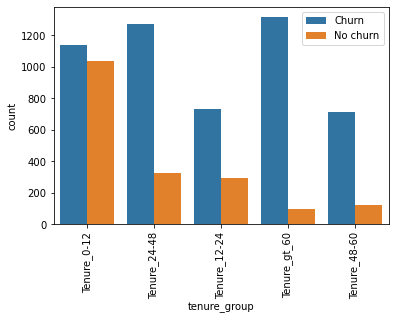

In [30]:
sns.countplot(data=telcom,x='tenure_group',hue='Churn')
pl.xticks(rotation=90)
pl.legend(['Churn','No churn'])
pl.show()

In [31]:
telcom[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]

MonthlyCharges  TotalCharges  tenure  tenure_group
0              29.85         29.85       1   Tenure_0-12
1              56.95       1889.50      34  Tenure_24-48
2              53.85        108.15       2   Tenure_0-12
3              42.30       1840.75      45  Tenure_24-48
4              70.70        151.65       2   Tenure_0-12
...              ...           ...     ...           ...
7027           84.80       1990.50      24  Tenure_12-24
7028          103.20       7362.90      72  Tenure_gt_60
7029           29.60        346.45      11   Tenure_0-12
7030           74.40        306.60       4   Tenure_0-12
7031          105.65       6844.50      66  Tenure_gt_60

[7032 rows x 4 columns]

In [32]:
tg_ch=churn['tenure_group'].value_counts().reset_index()
tg_ch.columns=['tenure_group','count']
tg_nch=no_churn['tenure_group'].value_counts().reset_index()
tg_nch.columns=['tenure_group','count']
tg_ch,tg_nch

(   tenure_group  count
 0   Tenure_0-12   1037
 1  Tenure_24-48    325
 2  Tenure_12-24    294
 3  Tenure_48-60    120
 4  Tenure_gt_60     93,
    tenure_group  count
 0  Tenure_gt_60   1314
 1  Tenure_24-48   1269
 2   Tenure_0-12   1138
 3  Tenure_12-24    730
 4  Tenure_48-60    712)

In [33]:
trace1=go.Bar(x=tg_ch['tenure_group'],y=tg_ch['count'],
             name='Churn Customers')
trace2=go.Bar(x=tg_nch['tenure_group'],y=tg_nch['count'],
             name='Non churn Customers')
layout=go.Layout(dict(title='Customer attrition in tenure groups',
                     xaxis=dict(title='tenure group'),
                     yaxis=dict(title='counts')))
data=[trace1,trace2]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [34]:
telcom[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]


MonthlyCharges  TotalCharges  tenure  tenure_group
0              29.85         29.85       1   Tenure_0-12
1              56.95       1889.50      34  Tenure_24-48
2              53.85        108.15       2   Tenure_0-12
3              42.30       1840.75      45  Tenure_24-48
4              70.70        151.65       2   Tenure_0-12
...              ...           ...     ...           ...
7027           84.80       1990.50      24  Tenure_12-24
7028          103.20       7362.90      72  Tenure_gt_60
7029           29.60        346.45      11   Tenure_0-12
7030           74.40        306.60       4   Tenure_0-12
7031          105.65       6844.50      66  Tenure_gt_60

[7032 rows x 4 columns]

In [35]:
def plot_tenure_scatter(tenure_group,color):
    tracer=go.Scatter(x=telcom[telcom['tenure_group']==tenure_group]['MonthlyCharges'],
                 y=telcom[telcom['tenure_group']==tenure_group]['TotalCharges'],
                      name=tenure_group,
                      mode='markers',
                 marker=dict(line=dict(color='black',width=0.2),size=4,
                            color=color,symbol='diamond-dot')
                 
                 )
    return tracer

def plot_churncharges_scatter(churn,color):
    tracer=go.Scatter(x=telcom[telcom['Churn']==churn]['MonthlyCharges'],
                     y=telcom[telcom['Churn']==churn]['TotalCharges'],
                    name=churn,
                      mode='markers',
                      marker=dict(line=dict(color='black',width=.2),
                                 size=4,color=color,
                                 symbol='diamond-dot')
                     
                     )
    return tracer
    
layout1=go.Layout(dict(title="Monthly and total charges by tenure group",
                  xaxis=dict(title='Monthly Charges'),
                 yaxis=dict(title='Total Charges')))
layout2=go.Layout(dict(title="Monthly and total charges by churns",
                  xaxis=dict(title='Monthly Charges'),
                 yaxis=dict(title='Total Charges')))
trace1 = plot_tenure_scatter("Tenure_0-12","#FF3300")
trace2 = plot_tenure_scatter("Tenure_12-24","#6666FF")
trace3 = plot_tenure_scatter("Tenure_24-48","#99FF00")
trace4 = plot_tenure_scatter("Tenure_48-60","#996600")
trace5 = plot_tenure_scatter("Tenure_gt_60","grey")
trace6 = plot_churncharges_scatter("Yes","red")
trace7 = plot_churncharges_scatter("No","blue")
data1   = [trace1,trace2,trace3,trace4,trace5] 
data2   = [trace7,trace6]
fig=go.Figure(data=data1,layout=layout1)
py.iplot(fig)

fig1=go.Figure(data=data2,layout=layout2)
py.iplot(fig1)



In [36]:
avg_tgc=telcom.groupby(['tenure_group','Churn'])[['MonthlyCharges','TotalCharges']].mean().reset_index()
def mean_charges(column,aggregate):
    tenure1=go.Bar(x=avg_tgc[avg_tgc['Churn']==aggregate]['tenure_group'],
                  y=avg_tgc[avg_tgc['Churn']==aggregate][column],
                  name=aggregate)
    return tenure1
def layout_(title):
    layout=go.Layout(dict(title='Average Monthly charges by Tenure Groups',
                         plot_bgcolor='rgb(243,243,243)',
                         paper_bgcolor='rgb(243,243,243)',
                         xaxis=dict(gridcolor='rgb(255,255,255)',
                                   title='Tenure Groups'),
                         yaxis=dict(gridcolor='rgb(255,255,255)',
                                   title=title)
                         ))
    return layout

tenure=mean_charges('MonthlyCharges','Yes')
tenure1=mean_charges('MonthlyCharges','No')
layout=layout_('Average Monthly Charges')
data=[tenure,tenure1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

tenure2=mean_charges('TotalCharges','Yes')
tenure3=mean_charges('TotalCharges','No')
data=[tenure2,tenure3]
layout=layout_('Average Total Charges')
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [37]:
avg_tgc

tenure_group Churn  MonthlyCharges  TotalCharges
0   Tenure_0-12    No       46.766169    265.768146
1   Tenure_0-12   Yes       66.493973    288.532064
2  Tenure_12-24    No       54.449589   1018.113493
3  Tenure_12-24   Yes       78.509014   1394.778401
4  Tenure_24-48    No       61.174783   2233.539007
5  Tenure_24-48   Yes       84.500000   3003.136462
6  Tenure_48-60    No       67.579143   3693.971770
7  Tenure_48-60   Yes       88.182500   4762.820000
8  Tenure_gt_60    No       74.440563   5086.077549
9  Tenure_gt_60   Yes       97.317742   6517.167204

In [38]:
telcom[['MonthlyCharges','TotalCharges']].head()

MonthlyCharges  TotalCharges
0           29.85         29.85
1           56.95       1889.50
2           53.85        108.15
3           42.30       1840.75
4           70.70        151.65

# Data Preprocessing

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [40]:
id_col=['customerID']
target_col=['Churn']

cat_cols=telcom.nunique()[telcom.nunique()<6].keys().tolist()
cat_cols=[i for i in cat_cols if i not in target_col]
num_cols=[i for i in telcom.columns if i not in cat_cols+target_col+id_col]
bin_cols=telcom.nunique()[telcom.nunique()==2].keys().tolist()
multi_cols=[i for i in cat_cols if i not in bin_cols]


In [41]:
le=LabelEncoder()
for i in bin_cols:
    telcom[i]=le.fit_transform(telcom[i])

In [42]:
telcom[bin_cols].head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  OnlineSecurity  \
0       0              0        1           0             0               0   
1       1              0        0           0             1               1   
2       1              0        0           0             1               1   
3       1              0        0           0             0               1   
4       0              0        0           0             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             1                 0            0            0                0   
1             0                 1            0            0                0   
2             1                 0            0            0                0   
3             0                 1            1            0                0   
4             0                 0            0            0                0   

   PaperlessBilling  Churn  colorz  
0                 1      0       1  
1                 0      0       1  
2                 1      1       0  
3                 0      0       1  
4                 1      1       0

In [43]:
telcom=pd.get_dummies(data=telcom,columns=multi_cols)

In [44]:
std=StandardScaler()
scaled=std.fit_transform(telcom[num_cols])
scaled=pd.DataFrame(scaled,columns=num_cols)

In [45]:
scaled.head()

tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

In [46]:
df_telcom=telcom.copy()
telcom=telcom.drop(num_cols,axis=1)
telcom=telcom.merge(scaled,left_index=True,right_index=True,how='left')

In [51]:
telcom.head()

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0               0             1                 0            0  ...   
1               1             0                 1            0  ...   
2               1             1                 0            0  ...   
3               1             0                 1            1  ...   
4               0             0                 0            0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               1                           0   

   tenure_group_Tenure_0-12  tenure_group_Tenure_12-24  \
0                         1                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         1                          0   

   tenure_group_Tenure_24-48  tenure_group_Tenure_48-60  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   tenure_group_Tenure_gt_60    tenure  MonthlyCharges  TotalCharges  
0                          0 -1.280248       -1.161694     -0.994194  
1                          0  0.064303       -0.260878     -0.173740  
2                          0 -1.239504       -0.363923     -0.959649  
3                          0  0.512486       -0.747850     -0.195248  
4                          0 -1.239504        0.196178     -0.940457  

[5 rows x 36 columns]

In [57]:
summary=df_telcom.describe().T.reset_index()
summary=summary.rename(columns={'index':'Features'})
summary.head(10)

Features   count       mean        std  min  25%   50%   75%   max
0            gender  7032.0   0.504693   0.500014  0.0  0.0   1.0   1.0   1.0
1     SeniorCitizen  7032.0   0.162400   0.368844  0.0  0.0   0.0   0.0   1.0
2           Partner  7032.0   0.482509   0.499729  0.0  0.0   0.0   1.0   1.0
3        Dependents  7032.0   0.298493   0.457629  0.0  0.0   0.0   1.0   1.0
4            tenure  7032.0  32.421786  24.545260  1.0  9.0  29.0  55.0  72.0
5      PhoneService  7032.0   0.903299   0.295571  0.0  1.0   1.0   1.0   1.0
6    OnlineSecurity  7032.0   0.286547   0.452180  0.0  0.0   0.0   1.0   1.0
7      OnlineBackup  7032.0   0.344852   0.475354  0.0  0.0   0.0   1.0   1.0
8  DeviceProtection  7032.0   0.343857   0.475028  0.0  0.0   0.0   1.0   1.0
9       TechSupport  7032.0   0.290102   0.453842  0.0  0.0   0.0   1.0   1.0

In [62]:
summary=np.around(summary,3)

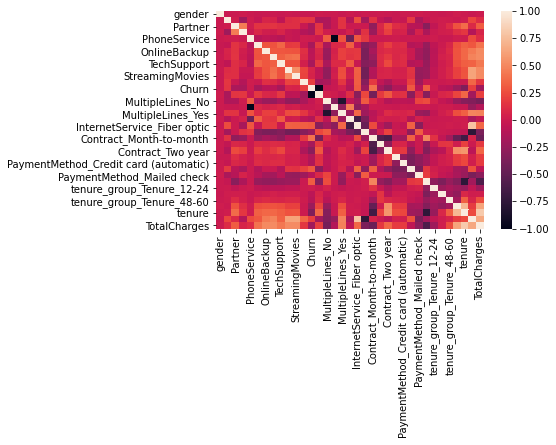

In [64]:
correlation=telcom.corr()
matrix_cols=correlation.columns.tolist()
sns.heatmap(correlation,annot=False)

In [76]:
corr_array=np.array(correlation)
trace=go.Heatmap(z=corr_array,
                x=correlation.columns.tolist(),
                y=correlation.columns.tolist(),
                colorscale='Blues',
                colorbar=dict(title='Pearson Correlation  Coeffcient',
                             titleside='right')
                )
layout=go.Layout(dict(title='Correlation Matrix for variable',
                      autosize=False,
                      height=720,
                      width=800,
                      margin=dict(r=0,l=210,t=25,b=210),
                      yaxis=dict(tickfont=dict(size=9)),
                      xaxis=dict(tickfont=dict(size=9))

))
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [107]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=telcom[[i for i in telcom.columns if i not in id_col+target_col]]
Y=telcom[target_col+id_col]

principal_components=pca.fit_transform(X)
pca_data=pd.DataFrame(principal_components,columns=['PCA1','PCA2'])

In [108]:
pca_data=pca_data.merge(Y,how='left',left_index=True,right_index=True)

In [109]:
pca_data

PCA1      PCA2  Churn  customerID
0    -2.010490 -0.179431      0  7590-VHVEG
1    -0.430850  0.824592      0  5575-GNVDE
2    -1.852575 -0.611216      1  3668-QPYBK
3    -0.080302  1.333319      0  7795-CFOCW
4    -1.645033 -1.601110      1  9237-HQITU
...        ...       ...    ...         ...
7027  0.651270 -0.189002      0  6840-RESVB
7028  3.494648  0.167778      0  2234-XADUH
7029 -1.762974  0.196933      0  4801-JZAZL
7030 -1.192339 -1.429608      1  8361-LTMKD
7031  3.019372  0.113253      0  3186-AJIEK

[7032 rows x 4 columns]

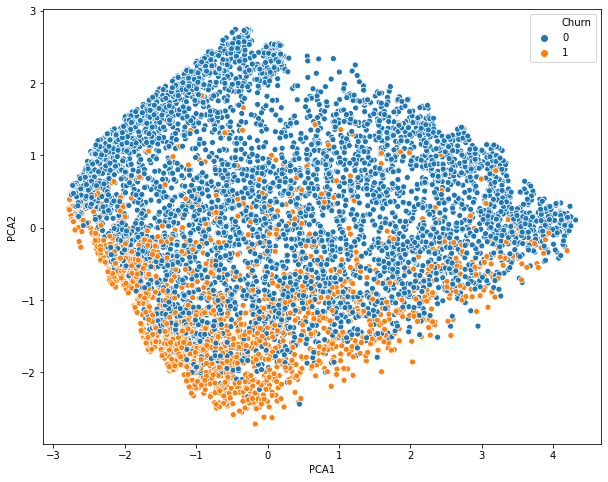

In [110]:
pl.figure(figsize=(10,8))
sns.scatterplot(data=pca_data,x='PCA1',y='PCA2',hue='Churn')
pl.show()

In [111]:
from sklearn.decomposition import TruncatedSVD

In [117]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
arr=svd.fit_transform(X)
# TruncatedSVD(n_components=2, n_iter=7, random_state=42)


In [119]:
temp_df=pd.DataFrame(arr)

In [124]:
temp_df.columns=['a','b','c','d','e']
temp_df.head()

a         b         c         d         e
0  1.215512 -2.338930 -0.062217  1.138244 -1.185698
1  1.790006 -0.846607  0.910311  0.782358  0.853924
2  1.603437 -2.357755 -0.443902  0.977403  0.285609
3  1.419557 -0.275435  1.329555  1.510026 -0.263075
4  1.277720 -1.998516 -1.516702 -0.392276  0.366719

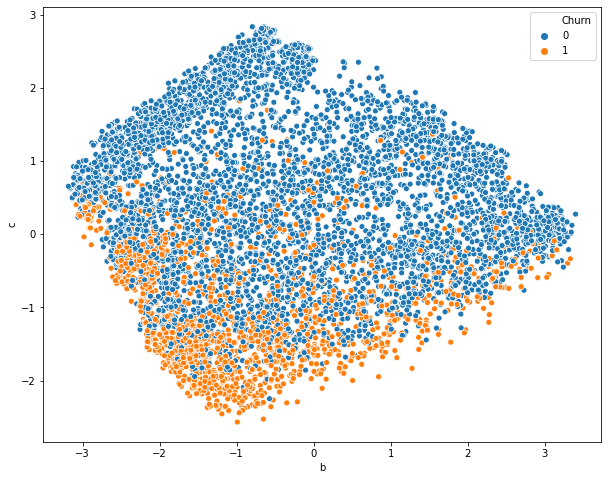

In [133]:
pl.figure(figsize=(10,8))
sns.scatterplot(data=temp_df,x='b',y='c',hue=pca_data['Churn'])
pl.show()